In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv
/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data/A_Z Handwritten Data.csv


In [3]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

2025-10-16 09:19:57.833564: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760606398.056400      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760606398.131773      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
path = kagglehub.dataset_download("sachinpatel21/az-handwritten-alphabets-in-csv-format")

In [6]:
df = pd.read_csv("/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv").astype('float32')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(372450, 785)

In [8]:
df.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.736685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490786,0.517295,0.421331,0.419179,0.385566,0.319819,0.208941,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [10]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [11]:
# reshape images into 2D form
X = X.reshape(-1, 28, 28,1)

# normalize values (0-1)
X = X / 255.0

In [12]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=26)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print("Train X shape: ", X_train.shape)
print("Train Y shape: ", y_train.shape)
print("Test X shape: ", X_test.shape)
print("Test Y shape: ", y_test.shape)

Train X shape:  (297960, 28, 28, 1)
Train Y shape:  (297960, 26)
Test X shape:  (74490, 28, 28, 1)
Test Y shape:  (74490, 26)


In [14]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPool2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(26, activation='softmax')  # 26 classes (A–Z)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-16 09:22:16.728571: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,538 (439.60 KB)

 Trainable params: 112,538 (439.60 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size = 200,
    validation_data=(X_test, y_test)
)

Epoch 1/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 123s 81ms/step - accuracy: 0.7616 - loss: 0.8313 - val_accuracy: 0.9629 - val_loss: 0.1251
Epoch 2/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 117s 79ms/step - accuracy: 0.9591 - loss: 0.1430 - val_accuracy: 0.9752 - val_loss: 0.0850
Epoch 3/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 117s 78ms/step - accuracy: 0.9708 - loss: 0.1031 - val_accuracy: 0.9797 - val_loss: 0.0713
Epoch 4/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 117s 79ms/step - accuracy: 0.9772 - loss: 0.0816 - val_accuracy: 0.9807 - val_loss: 0.0656
Epoch 5/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 119s 80ms/step - accuracy: 0.9800 - loss: 0.0695 - val_accuracy: 0.9826 - val_loss: 0.0602
Epoch 6/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 117s 78ms/step - accuracy: 0.9826 - loss: 0.0605 - val_accuracy: 0.9849 - val_loss: 0.0527
Epoch 7/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 117s 78ms/step - accuracy: 0.9844 - loss: 0.0524 - val_accuracy: 0.9860 - val_loss: 0.0509
Epoch 8/10
1490/1490 ━━━━━━━━━━━━━━━━━━━━ 117s 78ms/step - accuracy: 

In [22]:
# Evaluating on traing set
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f"Train accuracy: {test_acc:.2f}")

# Evaluating on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 0.9930 - loss: 0.0220
Test accuracy: 0.99
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9886 - loss: 0.0421
Test accuracy: 0.99


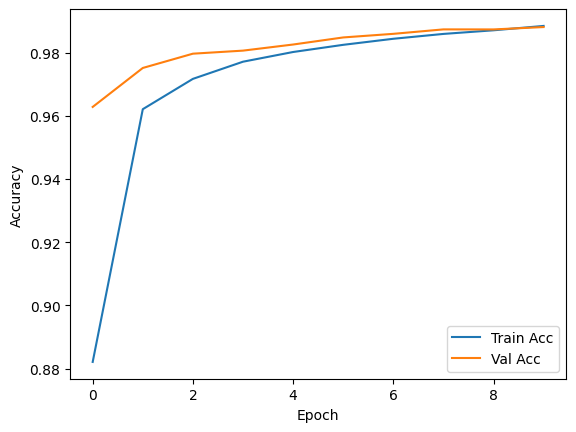

In [26]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Model Accuracy")
plt.legend()
plt.show()

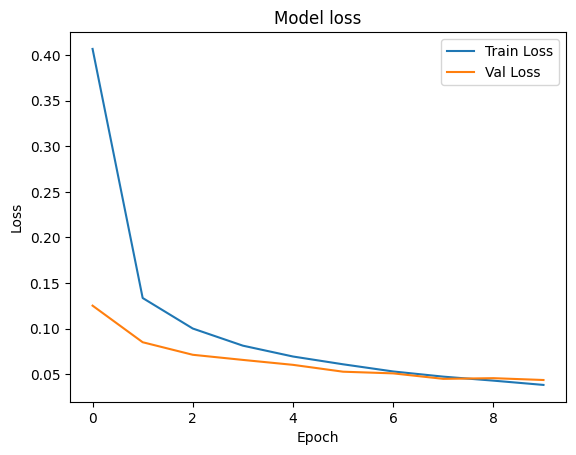

In [27]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend()
plt.show()

In [34]:
predictions = np.argmax(model.predict(X_test), axis=1)
print(predictions)

[18 25  2 ... 14 18 14]


In [38]:
model.save('alphabet_recognition_model.h5')

In [40]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/kaggle/working/alphabet_recognition_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


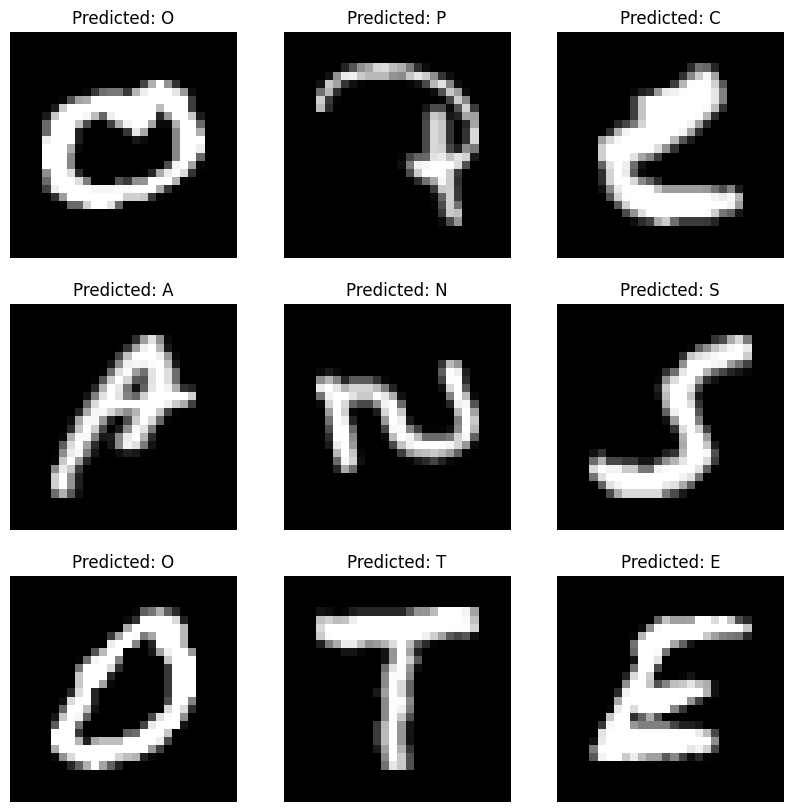

In [46]:
import random

# Choose random indices
indices = random.sample(range(len(X_test)), 9)  # 9 random samples
sample_images = X_test[indices]
predictions = loaded_model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {chr(predicted_classes[i] + 65)}")
    plt.axis('off')

plt.show()